In [1]:
import os 
import pathlib
import numpy as np 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [11]:
train_dir = "/home/jvdboss/workspace/ML_DL/human-action-recognition/train_data"
test_dir = "/home/jvdboss/workspace/ML_DL/human-action-recognition/test_data"

In [12]:
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [13]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image Shape:{img.shape}")  

Image Shape:(183, 275, 3)


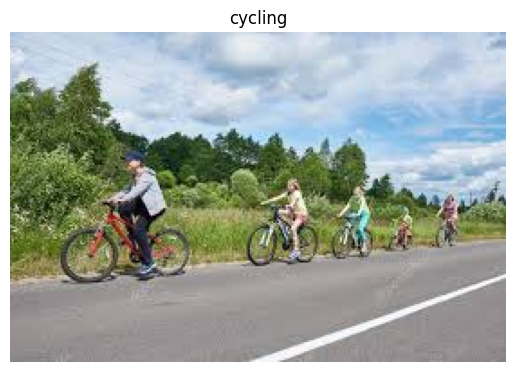

In [14]:
img=view_random_image("/home/jvdboss/workspace/ML_DL/human-action-recognition/test_data/",random.choice(class_names))

In [15]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(384,384),
                                            batch_size=32,
                                            class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                          target_size=(384,384),
                                          batch_size=32,
                                          class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [16]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
efficientnet_V2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2"
IMAGE_SHAPE=(224,224)

In [17]:
#creating function to use different models 
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax', name='output_layer')     
  ])

  return model

In [19]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_V2_url,
                                  num_classes=15)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, 
                                              epochs=1,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                             )

2023-02-02 13:33:54.952022: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.0KiB (rounded to 6144)requested by op Identity
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-02-02 13:33:54.952148: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2023-02-02 13:33:54.952186: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 41, Chunks in use: 41. 10.2KiB allocated for chunks. 10.2KiB in use in bin. 7.9KiB client-requested in use in bin.
2023-02-02 13:33:54.952209: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 32, Chunks in use: 32. 22.5KiB allocated for chunks. 22.5KiB in use in bin. 20.2KiB client-requested in use in bin.
2023-02-02 13:33:54.952229: I tensor

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Identity: Dst tensor is not initialized. [Op:Identity]

In [ ]:
# function for loss curves
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
efficientnet_model.summary()


In [ ]:
plot_loss_curves(efficientnet_history)


In [2]:
best_model_path = r"/home/jvdboss/workspace/ML_DL/human-action-recognition/human-action-recognition/artifacts/02_01_2023_16_03_46/ModelTrainerArtifacts/trained_model"
model = tf.keras.models.load_model(best_model_path)  

2023-02-02 13:37:17.315572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 13:37:17.446461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 13:37:17.446760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 13:37:17.447531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
image = r"/home/jvdboss/workspace/ML_DL/human-action-recognition/human-action-recognition/artifacts/02_01_2023_13_47_37/DataIngestionArtifacts/data/train_data/calling/images_083.jpg"
test_image = tf.keras.preprocessing.image.load_img(image, target_size = (224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
prediction = model.predict(test_image)

1/1 [==============================] - 0s 39ms/step


In [18]:
pred_label = np.argmax(prediction[0])
pred_label.item()

7

In [15]:
labels= {0: 'calling', 1: 'clapping', 2: 'cycling', 3: 'dancing', 4: 'drinking', 5: 'eating', 6: 'fighting', 7: 'hugging', 8: 'laughing', 9: 'listening_to_music', 10: 'running', 11: 'sitting', 12: 'sleeping', 13: 'texting', 14: 'using_laptop'}

In [19]:
predicted_class_name = labels[pred_label.item()]

In [21]:
predicted_class_name

'hugging'